In [13]:
# Data Preparation
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("cleaned_medical_data.csv")

# Step 1: Select only numerical columns
numerical_df = df.select_dtypes(include='number')

# Step 2: Drop ID/geographic columns manually
drop_cols = ['Case_order', 'Zip', 'Lat', 'Lng']
numerical_df = numerical_df.drop(columns=drop_cols, errors='ignore')

# Step 3: Drop discrete numerical columns (less than 10 unique values)
continuous_df = numerical_df.loc[:, numerical_df.nunique() >= 10]

# Step 4: Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(continuous_df)

# Step 5: Convert to DataFrame for easier handling
normalized_df = pd.DataFrame(normalized_data, columns=continuous_df.columns)

# Save the cleaned, standardized dataset
normalized_df.to_csv("cleaned_PCA_data.csv", index=False)

# Preview the normalized data
normalized_df.head()


,Population,Children,Age,Annual_income,VitD_levels,Initial_days,Total_charge,Additional_charges
0,-0.473168,-0.424650,-0.012466,1.852377,-0.239878,-0.963331,-0.799579,0.765005
1,0.090242,0.618716,-0.123621,0.254058,-0.062873,-0.762131,-0.496427,0.715114
2,0.482983,0.618716,-0.012466,-1.049511,-0.296400,-1.204772,-1.099651,0.698635
3,-0.526393,-0.946333,1.376969,-0.029858,-0.296400,-1.325492,-1.014517,0.009005
4,-0.315586,-0.424650,-1.735366,-1.578423,-0.378209,-1.325492,-1.186087,-1.408990


In [27]:
# PCA Matrix
from sklearn.decomposition import PCA

# Step 1: Fit PCA to the normalized data
pca = PCA()
pca_data = pca.fit_transform(normalized_df)

# Step 2: Create a DataFrame of the principal components
pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])

# Step 3: Preview the PCA Score matrix
pca_df.head()

# Step 4: Create the loading matrix
loading_matrix = pd.DataFrame(
    pca.components_.T,
    index=normalized_df.columns,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)]
)

# Step 5: Preview the loading matrix
loading_matrix.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Population,0.020228,-0.026029,0.611244,-0.033338,-0.512199,0.601429,0.010729,0.001695
Children,0.004298,0.011433,0.470238,0.447680,0.739544,0.176906,0.009086,0.002501
Age,0.083014,0.701730,0.012980,-0.013942,-0.016709,-0.013271,0.706822,0.016380
Annual_income,-0.007763,-0.007763,0.022609,0.830859,-0.434267,-0.346977,0.007784,0.001154
VitD_levels,0.541109,-0.053723,-0.413209,0.213452,0.028348,0.436525,0.023059,-0.544171


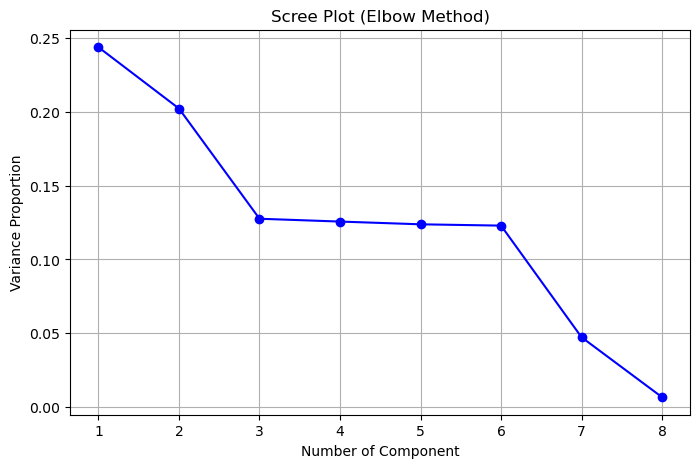

PC1: 0.2438
PC2: 0.2022
PC3: 0.1276
PC4: 0.1257
PC5: 0.1238
PC6: 0.1229
PC7: 0.0473
PC8: 0.0067
Total variance captured by the first 3 components: 0.5736


In [25]:
# Indentiy Principal Components

import matplotlib.pyplot as plt

# Line plot of individual variance proportions (Elbow Method style)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_var) + 1), explained_var, marker='o', color='blue')
plt.title('Scree Plot (Elbow Method)')
plt.xlabel('Number of Component')
plt.ylabel('Variance Proportion')
plt.grid(True)
plt.show()

# Show the explained variance ratio for each principal component
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.4f}")

# Sum of variance explained by the first 3 components
total_variance = sum(pca.explained_variance_ratio_[:3])
print(f"Total variance captured by the first 3 components: {total_variance:.4f}")

